In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [101]:
data = pd.read_csv('WeatherHw5.csv')

In [102]:
data['DidItRain'] = data['RainTotal'].apply(lambda x: 1 if x > 0 else 0)
data['SeattleRain'] = data['DayBeforeRainSeattle'].apply(lambda x: 1 if x > 0 else 0)
data['HotCold'] = data['TempAvg'].apply(lambda x: 1 if x >= 85.0 else (2 if x >= 50.0 else 3)) # Hot = 1, Mild = 2, Cold = 3
data['Season'] = data['Season'].apply(lambda x: 0 if x == "Winter" else (1 if x == "Spring" else (2 if x == "Summer" else 3)))

In [103]:
data['Season'] = data['Season'].astype('category')

data['Season_Cat'] = data['Season'].cat.codes

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(data[['Season_Cat']]).toarray())

# merge with main df bridge_df on key values
data = data.join(enc_df)

In [119]:
scaler = MinMaxScaler()
data[['TempMax','TempAvg','TempMin','PressureMax','HumidityMin','HumidityAvg','DewAvg','DewMax']] = scaler.fit_transform(data[['TempMax','TempAvg','TempMin','PressureMax','HumidityAvg','HumidityAvg', 'DewAvg','DewMax']])


In [120]:
data
#'TempMax','PressureMax','HumidityMin','HumidtyAvg','DewAvg'

,Date,TempMax,TempAvg,TempMin,DewMax,DewAvg,DewMin,HumidityMax,HumidityAvg,HumidityMin,...,DayBeforeRainSeattle,Season,DidItRain,SeattleRain,HotCold,Season_Cat,0,1,2,3
0,112015,0.125000,0.163180,0.181818,0.205882,0.228277,2,88,0.774595,0.774595,...,0.00,0,0,0,3,0,1.0,0.0,0.0,0.0
1,122015,0.134615,0.178870,0.193182,0.191176,0.225331,4,85,0.699875,0.699875,...,0.00,0,0,0,3,0,1.0,0.0,0.0,0.0
2,132015,0.182692,0.221757,0.250000,0.264706,0.300442,10,92,0.748443,0.748443,...,0.00,0,0,0,3,0,1.0,0.0,0.0,0.0
3,142015,0.250000,0.290795,0.340909,0.470588,0.402062,14,92,0.767123,0.767123,...,0.06,0,0,1,3,0,1.0,0.0,0.0,0.0
4,152015,0.317308,0.365063,0.431818,0.558824,0.569956,26,100,0.960149,0.960149,...,0.10,0,1,1,3,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,12272019,0.288462,0.355649,0.409091,0.411765,0.463918,21,85,0.696139,0.696139,...,0.00,0,0,0,3,0,1.0,0.0,0.0,0.0
1822,12282019,0.317308,0.350418,0.386364,0.426471,0.474227,22,92,0.750934,0.750934,...,0.05,0,0,1,3,0,1.0,0.0,0.0,0.0
1823,12292019,0.259615,0.351464,0.420455,0.485294,0.509573,22,92,0.833126,0.833126,...,0.01,0,0,1,3,0,1.0,0.0,0.0,0.0
1824,12302019,0.278846,0.360879,0.431818,0.426471,0.471281,22,82,0.696139,0.696139,...,0.00,0,1,0,3,0,1.0,0.0,0.0,0.0


In [152]:
feature_cols = ['TempAvg','TempMax','DewAvg','HumidityMax','HumidityAvg', 'HumidityMin',
                'WindAvg','PressureMin','PressureAvg', 'PressureMax', 'SeattleRain','Season'] 
# feature_cols = ['TempAvg','DewAvg','HumidityAvg','WindAvg', 'PressureAvg', 'SeattleRain','HotCold']
#decided to do averages since someone would probably know those features better than the max/min for the day
X = data[feature_cols] # Features
y = data.DidItRain # Target variable

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [154]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [155]:
#X_test

In [156]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8555798687089715


Text(0.5, 0, 'Importance')

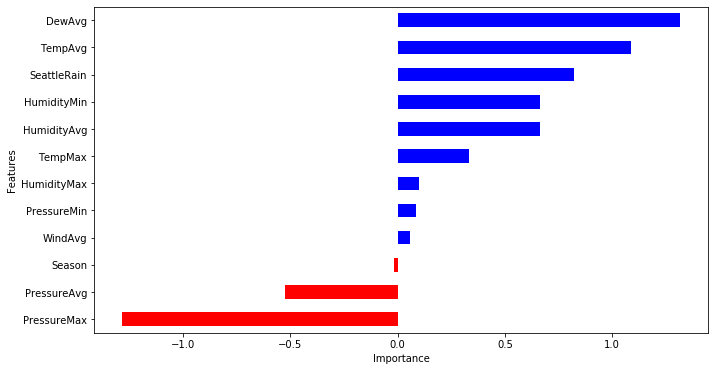

In [141]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features["Features"] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11,6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [142]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[333,  20],
       [ 46,  58]])

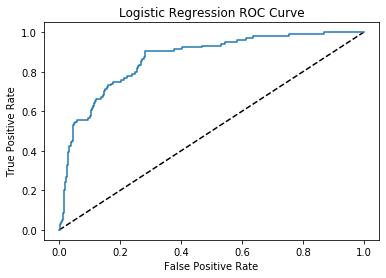

In [143]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [144]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8661200697319678

In [145]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6373626373626373

In [146]:
from sklearn.model_selection import KFold
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 83.08%


## Findings
### Is it accurate?
The model incresed a lot more than what it was previously scored as 81%. One of the pieces that helped the most was adding rain from Seattle from the day previous. So, that was the most influential factor. I think that makes sense because the rain normally continues to travel inland towards Boise. Another piece that helped was making categories based on temperature. That is what is in the 'HotCold' column so it categorizes based on hot, mild, and cold. This would make sense becasue it is easier to decide the importance between 3 values instead of many unique values. I did a one hot encode on Seasons but it did not really do anything for the analysis. I actually ended up taking out 'HotCold' after doing some scaling since I had the TempAvg that seemed to be a more succesful feature and when I had temperature and Hotcold in my feature columns it made my prediction worse. I think my model is a good model but I could not get it to 86% like I wanted to. I am satisfied with trying the new feature scaling concepts but I am dissapointed in not being able to raise it higher.

Tested both 2 days before in Seattle if it rained and 1 day before in Seattle if it rained. 1 day before made a better accuracy than 2 days before.